In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# importing required modules 
from zipfile import ZipFile 

# specifying the zip file address 
file_name = "/gdrive/My Drive/metadata.csv.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip:

	# extracting all the files 
	print('Extracting all the files now...') 
	zip.extractall('/content') 
	print('Done!') 


Extracting all the files now...
Done!


In [ ]:
import csv
metadata = '/content/metadata.csv'
with open(metadata, 'r') as csvfile:
  readdata = csv.reader(csvfile, delimiter=',', quotechar='"' )
  data = list(readdata)
print(len(data))
for i in range(10):
  print(data[i])

45775
['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract', 'publish_time', 'authors', 'journal', 'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text', 'full_text_file', 'url']
['vho70jcx', 'f056da9c64fbf00a4645ae326e8a4339d015d155', 'biorxiv', 'SIANN: Strain Identification by Alignment to Near Neighbors', '10.1101/001727', '', '', 'biorxiv', 'Next-generation sequencing is increasingly being used to study samples composed of mixtures of organisms, such as in clinical applications where the presence of a pathogen at very low abundance may be highly important. We present an analytical method (SIANN: Strain Identification by Alignment to Near Neighbors) specifically designed to rapidly detect a set of target organisms in mixed samples that achieves a high degree of species- and strain-specificity by aligning short sequence reads to the genomes of near neighbor organisms, as well as that of the target. Empirical benchmarking alongside the 

In [ ]:
# Setup
!pip install -q wordcloud
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
checkdata = input('enter the data that you want to search.')
# Get stopwords
stopwords = nltk.corpus.stopwords.words('english')
# Get punctuation
y = str(string.punctuation)
punctuation = []
for i in range(len(y)):
  punctuation.append(y[i])

# Tokenize by sentence, then by lowercase word
tokens = [word.lower() for sent in nltk.sent_tokenize(checkdata) for word in nltk.word_tokenize(sent)]
print(len(tokens))
tokenset = set(tokens)
print(len(tokenset))
tokenset = tokenset.difference(set(stopwords+punctuation))
print(tokenset)
N =print(len(tokenset))
# number of terms in the check document N
N = len(tokenset)

enter the data that you want to search.What is known about transmission, incubation, and environmental stability? COVID-19 Open Research Dataset Challenge (CORD-19)  Paul Mooney · 66 Submissions  Task Details What is known about transmission, incubation, and environmental stability? What do we know about natural history, transmission, and diagnostics for the virus? What have we learned about infection prevention and control?  Specifically, we want to know what the literature reports about:  Range of incubation periods for the disease in humans (and how this varies across age and health status) and how long individuals are contagious, even after recovery. Prevalence of asymptomatic shedding and transmission (e.g., particularly children). Seasonality of transmission. Physical science of the coronavirus (e.g., charge distribution, adhesion to hydrophilic/phobic surfaces, environmental survival to inform decontamination efforts for affected areas and provide information about viral sheddin

In [ ]:
import numpy as np

#to operate index operation we need to convert the set into list
tokenlist = list(tokenset)

#only checking how is data and find the index of abstrack
print(data[1])
print(len(data[1][8]))

#create a numpy  array of shape(no. of tokens to check, no. of data in dataset)
#a[i][j] contain no. of times ith token comes in abstract of jth document divided by (length of abstract/length of token)
#a[i][j]basically gives idea about how frequently the ith token occurs in jth document.
a = np.zeros((N,len(data)), dtype=np.float64  )
for i in range(1,len(data)):
  for j in range(len(tokenlist)):
    N1 = len(data[i][8])/len(tokenlist[j])
    if N1 > 5:
      N2 = (data[i][8].lower().count(tokenlist[j]))/N1
    else:
      N2 = 0
    a[j][i] = N2


#checking the a matrix
print(a[1][:])

#if any word occur in every document then this word should given less priority in finding answer.
#greater priority should given to unique words that occur in few documents frequently.
#to do this we create new numpy array b and provide the value of b[i][j] = 1 if a[i][j]>1 (means count in not zero)
b = np.zeros_like(a)
for i in range(1,len(data)):
  for j in range(len(tokenlist)):
    if a[j][i] > 0:
      b[j][i] = 1
#c gives sum of each row , it gives the count of document in which the word is present
c = np.sum( b, axis = 1 ) 

#checking the matrix c and its shape
print( c )
print(c.shape)

# e matrix will have the weightage of the words to find the answer
d = np.divide(len(data),c)
d.reshape((1,N))
print(len(d))
for i in range(len(d)):
  if(np.isinf(d[i])):
    d[i]=1
e = np.log(d)
print(e)
print(e.shape)

# f matrix have the possibility of answer in the document 
f = np.dot(e,a)
print(f.shape)
print(f)


['vho70jcx', 'f056da9c64fbf00a4645ae326e8a4339d015d155', 'biorxiv', 'SIANN: Strain Identification by Alignment to Near Neighbors', '10.1101/001727', '', '', 'biorxiv', 'Next-generation sequencing is increasingly being used to study samples composed of mixtures of organisms, such as in clinical applications where the presence of a pathogen at very low abundance may be highly important. We present an analytical method (SIANN: Strain Identification by Alignment to Near Neighbors) specifically designed to rapidly detect a set of target organisms in mixed samples that achieves a high degree of species- and strain-specificity by aligning short sequence reads to the genomes of near neighbor organisms, as well as that of the target. Empirical benchmarking alongside the current state-of-the-art methods shows an extremely high Positive Predictive Value, even at very low abundances of the target organism in a mixed sample. SIANN is available as an Illumina BaseSpace app, as well as through Signat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide


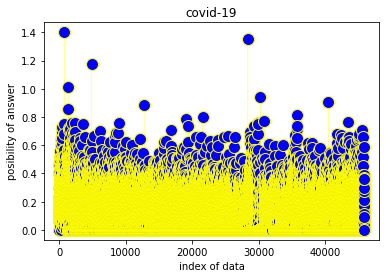

In [ ]:
import matplotlib.pyplot as plt 

# x axis values 
x = list(range(len(data)))
y = f

#plotting the points 
plt.plot(x,y, color='yellow', linestyle='dashed', linewidth = 0.3, 
         marker='o', markerfacecolor='blue', markersize=12)  

# naming the x axis 
plt.xlabel('index of data') 
# naming the y axis 
plt.ylabel('posibility of answer') 

# giving a title to my graph 
plt.title('covid-19') 

# function to show the plot 
plt.show() 


In [ ]:
#abstracting of data 
# you can change the value of filtr from above graph such that sufficient amount of data get filtered here i choose filter is 0.6 so all the data below 0.6 get filtered.
count = 0
filtr = 0.6
for i in range(len(data)):
  if f[i]>filtr:
    print(data[i][8])
    print(f[i])
    count = count+1
print(count)

Objectives: Amid the continuing spread of the novel coronavirus (COVID-19), the incubation period of COVID-19 should be regularly re-assessed as more information is available upon the increase in reported cases. The present work estimated the distribution of incubation periods of patients infected in and outside Hubei province of China. Methods: Clinical data were collected from the individual cases reported by the media as they were not fully available on the official pages of the Chinese health authorities. MLE was used to estimate the distributions of the incubation period. Results: It was found that the incubation period of patients with no travel history to Hubei was longer and more volatile. Conclusion: It is recommended that the duration of quarantine should be extended to at least 3 weeks.
0.6463859742612833
The potential infectiousness of asymptomatic COVID-19 cases together with a substantial fraction of asymptomatic infections among all infections, have been highlighted in c